In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
# Using subset of data
df = pd.read_csv('/content/loan_application.csv',usecols=['Employment','MaritalStatus','ApplicationApproved'])
df.head()

,Employment,MaritalStatus,ApplicationApproved
0,Retired,Single,1
1,Self_Employed,Widowed,1
2,Retired,Divorced,0
3,Self_Employed,Divorced,0
4,Employed_PartTime,NaN,0


In [3]:
df['Employment'].isnull().sum()

np.int64(3493)

In [4]:
df['MaritalStatus'].isnull().sum()

np.int64(3429)

<Axes: xlabel='count', ylabel='Employment'>

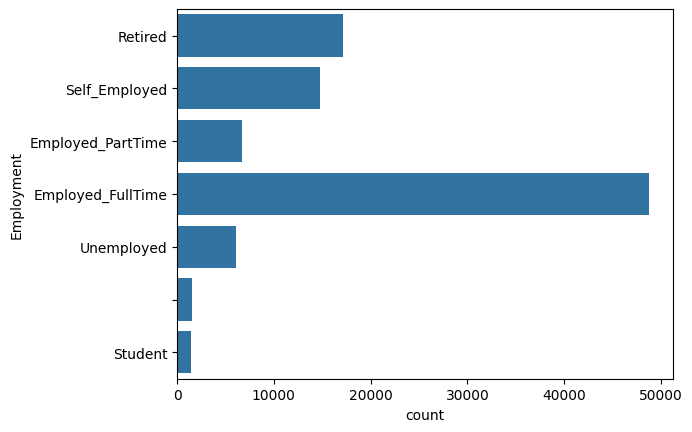

In [5]:
sns.countplot(df['Employment'])

<Axes: xlabel='count', ylabel='MaritalStatus'>

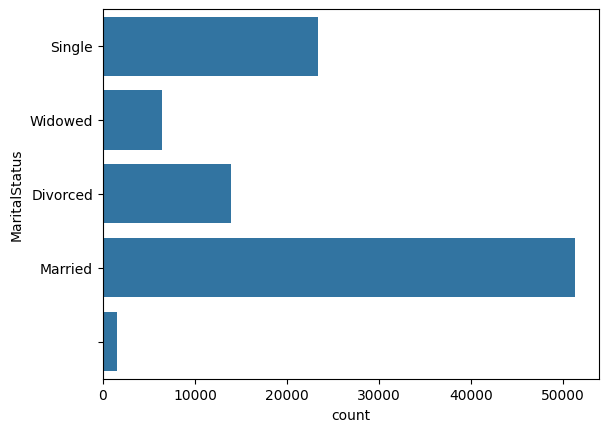

In [6]:
sns.countplot(df['MaritalStatus'])

In [7]:
# df['Employment'].str.replace(' ',np.nan)
df = df.replace(' ',np.nan)

# Filling Values using Mode

In [8]:
X = df.iloc[:,:2]
y = df['ApplicationApproved']

In [9]:
y

,ApplicationApproved
0,1
1,1
2,0
3,0
4,0
...,...
99995,1
99996,1
99997,1
99998,1


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [12]:
# Filling values using pandas
X_train_new = X_train['Employment'].fillna(df['Employment'].mode())
X_test_new = X_test['MaritalStatus'].fillna(df['MaritalStatus'].mode())

In [13]:
# Filling values using sklearn Simple Imputer class
ct = ColumnTransformer([
    ('Mode_Imput',SimpleImputer(strategy='most_frequent'),['Employment','MaritalStatus'])
])

X_train_imp = ct.fit_transform(X_train)
X_test_imp = ct.transform(X_test)

In [14]:
X_train_imp

array([['Student', 'Married'],
       ['Employed_FullTime', 'Widowed'],
       ['Self_Employed', 'Married'],
       ...,
       ['Student', 'Divorced'],
       ['Retired', 'Married'],
       ['Self_Employed', 'Married']], dtype=object)

# Creating New Category

In [21]:
X_train_new = X_train.copy()
X_test_new = X_test.copy()

In [22]:
X_train_new['Employment'].fillna('Missing',inplace=True)
X_train_new['MaritalStatus'].fillna('Missing',inplace=True)

/tmp/ipython-input-811008624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_new['Employment'].fillna('Missing',inplace=True)
/tmp/ipython-input-811008624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [24]:
X_test_new['Employment'].fillna('Missing',inplace=True)
X_test_new['MaritalStatus'].fillna('Missing',inplace=True)

/tmp/ipython-input-3770447517.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test_new['Employment'].fillna('Missing',inplace=True)
/tmp/ipython-input-3770447517.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

<Axes: xlabel='count', ylabel='Employment'>

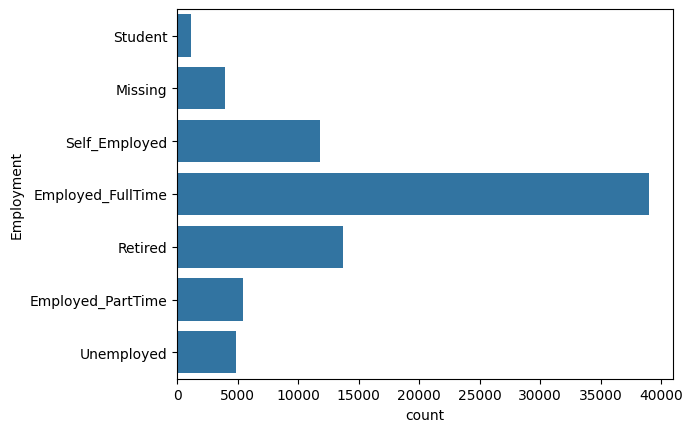

In [25]:
sns.countplot(X_train_new['Employment'])

<Axes: xlabel='count', ylabel='MaritalStatus'>

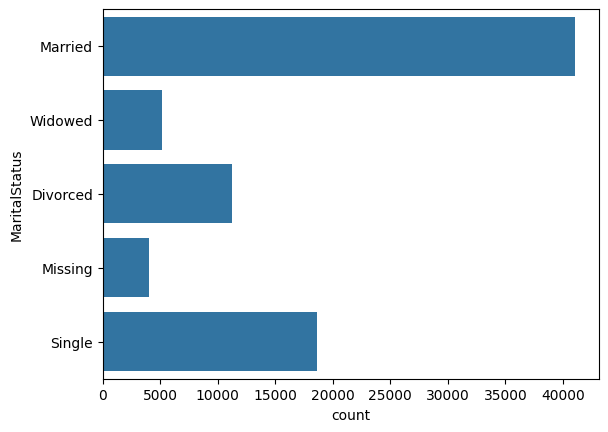

In [26]:
sns.countplot(X_train_new['MaritalStatus'])